In [22]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#Creating a file and connecting to the SQLite database
db_file="Sample_sales_data.db"
conn=sqlite3.connect(db_file)
cursor=conn.cursor()

#Creating SQL table
create_table_sql="""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY,
    product TEXT NOT NULL,
    quantity INTEGER NOT NULL,
    price REAL NOT NULL
);
"""

#Sample sales data (Product, Quantity, Price)
sales_data=[
    ('Laptop', 20, 950.00),
    ('Keyboard', 150, 45.00),
    ('Monitor', 35, 250.00),
    ('Mouse', 200, 15.00),
    ('Laptop', 10, 950.00),
    ('Keyboard', 50, 45.00)
]

#Executing the table creation and insert the data
cursor.execute(create_table_sql)
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sales_data)

#Committing the changes
conn.commit()
conn.close()

print(f"Database '{db_file}' created with sample data.")

Database 'Sample_sales_data.db' created with sample data.


In [23]:
# 1. Reconnect to the database
conn = sqlite3.connect(DB_FILE)

# 2. Define the SQL query for the sales summary
# This query calculates the total quantity sold and total revenue (quantity * price)
# for each distinct product.
QUERY = """
SELECT
    product,
    SUM(quantity) AS total_quantity_sold,
    SUM(quantity * price) AS total_revenue
FROM sales
GROUP BY product
ORDER BY total_revenue DESC;
"""

#Loading the results into a DataFrame
try:
    summary_df=pd.read_sql_query(QUERY, conn)
    print("Data successfully loaded into a pandas DataFrame.")
except pd.io.sql.DatabaseError as e:
    print(f"An error occurred while executing the SQL query: {e}")
    summary_df=None

# Close the database connection
conn.close()

Data successfully loaded into a pandas DataFrame.


In [24]:
if summary_df is not None:
    print("Sales Summary Table")
    print(sales_summary_df)

#Summary of the sample data 
total_qty=summary_df['total_quantity_sold'].sum()
total_revenue=summary_df['total_revenue'].sum()

print("\nTotals")
print(f"Total units sold of all products: {total_qty}")
print(f"Total revenue of all products: ${total_revenue:,.2f}")

Sales Summary Table
    product  total_quantity_sold  total_revenue
0    Laptop                   30        28500.0
1  Keyboard                  200         9000.0
2   Monitor                   35         8750.0
3     Mouse                  200         3000.0

Totals
Total units sold of all products: 465
Total revenue of all products: $49,250.00



Bar Chart
Chart saved as 'sales_revenue_chart.png'.


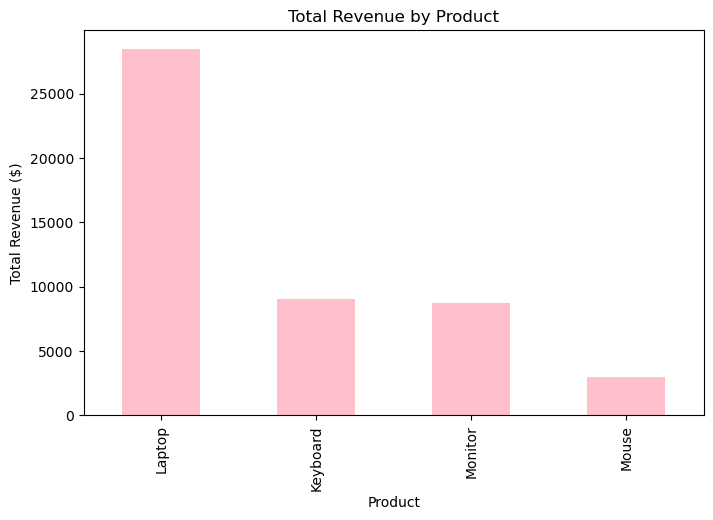

In [32]:
print("\nBar Chart")
#Using the pandas plot method
ax=sales_summary_df.plot(kind='bar', x='product', y='total_revenue', legend=False, color='pink', figsize=(8, 5))

#Creating the bar plot
plt.title('Total Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Total Revenue ($)')
plt.grid(False)

#Saving the chart
chart_file="sales_revenue_chart.png"
plt.savefig(chart_file)
print(f"Chart saved as '{chart_file}'.")
plt.show()